# Lesson 1

## Cats vs. Dogs Redux

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import os, glob
from matplotlib import pyplot as plt
from utils import plots
import csv

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [38]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
import utils; reload(utils)
import utils

In [4]:
import vgg16; reload (vgg16)
from vgg16 import Vgg16

In [12]:
# Configure the batch_size and the path to use

base_data_path = '/home/ubuntu/ofir/data/dogscatsredux/'
data_path = base_data_path
# data_path = base_data_path + 'sample/'

path_to_weights_dir = base_data_path + 'saved-weights/'

batch_size = 64

In [6]:
vgg16 = Vgg16()

In [7]:
batches = vgg16.get_batches(data_path + 'train/', batch_size = batch_size)
valid_batches = vgg16.get_batches(data_path + 'valid/', batch_size = batch_size)

Found 22778 images belonging to 2 classes.
Found 2222 images belonging to 2 classes.


In [8]:
vgg16.finetune(batches)

In [9]:
vgg16.fit(batches=batches, val_batches=valid_batches, nb_epoch=1)

Epoch 1/1
22778/22778 [==============================] - 595s - loss: 0.1178 - acc: 0.9697 - val_loss: 0.0804 - val_acc: 0.9811


In [32]:
! ls -la '/home/ubuntu/ofir/data/dogscatsredux/saved-weights/'

total 524548
drwxrwxr-x 2 ubuntu ubuntu      4096 Mar 13 13:17 .
drwxrwxr-x 7 ubuntu ubuntu      4096 Mar 13 13:16 ..
-rw-rw-r-- 1 ubuntu ubuntu 537127264 Mar 13 13:17 fit1.h5f


In [29]:
# Save the fit to disc. 
vgg16.model.save_weights(path_to_weights_dir + 'fit1.h5f')

In [58]:
??vgg16.finetune

In [59]:
vgg16.fit(batches=batches, val_batches=valid_batches, nb_epoch=1)
vgg16.model.save_weights(path_to_weights_dir + 'fit2.h5f')

Epoch 1/1
22778/22778 [==============================] - 594s - loss: 0.0976 - acc: 0.9766 - val_loss: 0.0936 - val_acc: 0.9793


In [60]:
vgg16.fit(batches=batches, val_batches=valid_batches, nb_epoch=2)
vgg16.model.save_weights(path_to_weights_dir + 'fit3.h5f')

Epoch 1/2
22778/22778 [==============================] - 595s - loss: 0.1026 - acc: 0.9772 - val_loss: 0.0811 - val_acc: 0.9838
Epoch 2/2
22778/22778 [==============================] - 595s - loss: 0.1007 - acc: 0.9791 - val_loss: 0.0929 - val_acc: 0.9842


In [61]:
# check valid batches
imgs,actual_labels = next(valid_batches)
conf, indices, labels = vgg16.predict(imgs, True)
conf

array([ 1.    ,  1.    ,  1.    ,  1.    ,  0.9999,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
        1.    ,  0.9101,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  0.9927,  1.    ,
        1.    ,  1.    ,  1.    ,  0.9944,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
        1.    ,  1.    ,  1.    ,  1.    ,  0.9969,  1.    ,  0.918 ,  1.    ,  1.    ,  1.    ,
        1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  0.9898,
        1.    ,  0.998 ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
        1.    ,  1.    ,  1.    ,  1.    ], dtype=float32)

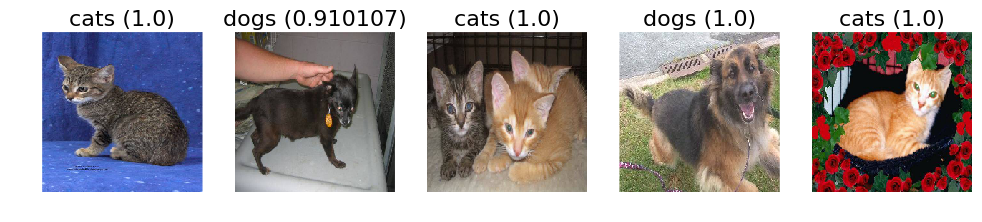

In [62]:
idx1 = 10
idx2 = 15
plots(imgs[idx1:idx2], titles=["%s (%s)" % (l, c) for l, c in zip(labels[idx1:idx2], conf[idx1:idx2])])

In [41]:
??vgg16.get_batches

In [46]:
pred_batches = ImageDataGenerator().flow_from_directory(
    data_path + 'test/',
    target_size=(224,224,),
    batch_size=2*batch_size,
    shuffle=False,
    class_mode=None,
)
preds, = vgg16.model.predict_generator(pred_batches, val_samples=pred_batches.nb_sample)

Found 12500 images belonging to 1 classes.


KeyboardInterrupt: 

In [47]:
preds[:5]

NameError: name 'preds' is not defined

In [63]:
# Predict on entire test data and save to CSV file.
test_batches = vgg16.get_batches(data_path + 'test/', batch_size = batch_size, shuffle=False)
# while next(test_batches):
# imgs, labels = next(test_batches)
#     conf, indices, labels = vgg16.predict(imgs, True)

Found 12500 images belonging to 1 classes.


In [83]:
# test_batches.filenames

In [64]:
test_labels = []
filenames = test_batches.filenames

In [85]:
# imgs, labels = next(test_batches)
# conf, indices, labels = vgg16.predict(imgs, True)

In [86]:
# idx1 = 0
# idx2 = 5
# plots(imgs[idx1:idx2], titles=["%s (%s)" % (l, c) for l, c in zip(labels[idx1:idx2], conf[idx1:idx2])])

In [87]:
# filenames[0:5]

In [65]:
idx = 0
while len(test_labels) < len(filenames):
    imgs, labels = next(test_batches)
    conf, indices, labels = vgg16.predict(imgs, True)
    
    
    for i in range(0,batch_size):
        
        # We need the chances of the animal being a dog.
        if labels[i] == 'dogs':
#             res = "{0:.4f}".format(conf[i])
            res = conf[i]
        else:
#             res = "{0:.4f}".format(1. - conf[i])
            res = 1. - conf[i]
                
        test_labels.append((
            filenames[idx][len('unknown/'):-len('.jpg')],
            res
        ))
        idx += 1
    print "%s..." % idx

64...
128...
192...
256...
320...
384...
448...
512...
576...
640...
704...
768...
832...
896...
960...
1024...
1088...
1152...
1216...
1280...
1344...
1408...
1472...
1536...
1600...
1664...
1728...
1792...
1856...
1920...
1984...
2048...
2112...
2176...
2240...
2304...
2368...
2432...
2496...
2560...
2624...
2688...
2752...
2816...
2880...
2944...
3008...
3072...
3136...
3200...
3264...
3328...
3392...
3456...
3520...
3584...
3648...
3712...
3776...
3840...
3904...
3968...
4032...
4096...
4160...
4224...
4288...
4352...
4416...
4480...
4544...
4608...
4672...
4736...
4800...
4864...
4928...
4992...
5056...
5120...
5184...
5248...
5312...
5376...
5440...
5504...
5568...
5632...
5696...
5760...
5824...
5888...
5952...
6016...
6080...
6144...
6208...
6272...
6336...
6400...
6464...
6528...
6592...
6656...
6720...
6784...
6848...
6912...
6976...
7040...
7104...
7168...
7232...
7296...
7360...
7424...
7488...
7552...
7616...
7680...
7744...
7808...
7872...
7936...
8000...
8064...
8128...


IndexError: list index out of range

In [93]:
float(test_labels[0][1]) >= 0.8

False

In [66]:
# Sort the list and prepare it for writing to file
test_labels = sorted(test_labels, key=lambda x: int(x[0]))

# Fix-confidence
for i in range(0, len(test_labels)):
    old_val = float(test_labels[i][1])
    if old_val <= 0.04:
        new_val = 0.04
    elif old_val >= 0.96:
        new_val = 0.96
    else:
        new_val = test_labels[i][1]
    
    test_labels[i] = (test_labels[i][0], new_val)


In [67]:
# Write the list to a CSV file
with open('submissions-conffix-fit3.csv', 'wb') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',)
    writer.writerow(['id', 'label'])
    for row in test_labels:
        writer.writerow(row)

In [68]:
for row in test_labels[:15]:
    print row

('1', 0.96)
('2', 0.96)
('3', 0.96)
('4', 0.96)
('5', 0.04)
('6', 0.04)
('7', 0.04)
('8', 0.04)
('9', 0.04)
('10', 0.04)
('11', 0.04)
('12', 0.96)
('13', 0.04)
('14', 0.04)
('15', 0.04)


In [77]:
for i in range(0, len(test_labels)):
    if test_labels[i][1] > 0.2 and test_labels[i][1] < 0.8:
        print test_labels[i], i